In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [173]:
data = pd.read_excel('ICUfinal.xlsx', engine="openpyxl", index_col=0)

In [174]:
data[data["PATIENT_VISIT_IDENTIFIER"] == 23]["ICU"]

115    0
116    0
117    0
118    0
119    0
Name: ICU, dtype: int64

In [175]:
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,0
1921,384,0,50th,1,0.0,0.0,1.0,0.605263,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,0
1922,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,0
1923,384,0,50th,1,0.0,0.0,1.0,NaN,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,NaN,0


In [176]:
# data["OXYGEN_SATURATION_DIFF"].value_counts()

illnese calculations

In [177]:
diseases = []
for x in data["tags"]:
    if isinstance(x, str):
        diseases.extend(x.split(", "))
diseases = list(set(diseases))
print(diseases)

['Motor Neurone Disease', 'heart disease', 'Kidney disease', 'Smoker', 'asthma', 'Lung cancer']


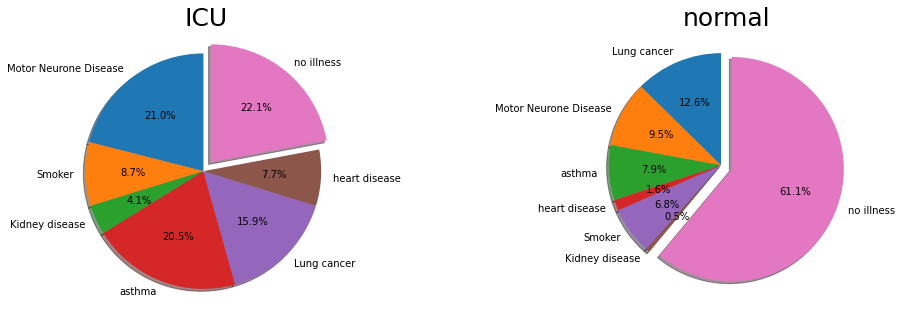

In [178]:
# check which of them are more common in ICU patients. give numbers to them based on that
def count_diseases(df):
    disease_count = {}
    for i, row in df.iterrows():
        if isinstance(row["tags"], str):
            for disease in diseases:
                if disease in row["tags"]:
                    disease_count[disease] = disease_count.get(disease, 0) + 1
    disease_count["no illness"] =  len(df.index) - sum(disease_count.values())
    return disease_count
    
ICU_patients = data.query('ICU == 1 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(ICU_patients)
fig, ax = plt.subplots(1, 2)
ax[0].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('ICU', fontsize=25, fontname="DejaVu Sans")
ax[0].axis('equal') 

Healthy_patients = data.query('ICU == 0 and WINDOW == "ABOVE_12"')
disease_count = count_diseases(Healthy_patients)
ax[1].pie(disease_count.values(), explode=[0] * (len(disease_count) - 1) + [0.1] , labels=disease_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('normal', fontsize=25, fontname="DejaVu Sans")
ax[1].axis('equal')
fig.set_size_inches(14, 5)
fig.subplots_adjust(wspace=1)
plt.show()

as we see most deadly diseases are 'motor neurone disease', 'asthma' and 'lung cancer' at first place.<br>
smoke and heart disease at second place and Kidney disease at third place.<br>
we give numbers to each of them as bellow <br>
motor, asthma or lung caner --> 3<br>
smoke or heart disease --> 2<br>
kidney disease --> 1<br>
no disease --> 0

In [179]:
# [, , 'Kidney disease', , , ]
data["tags"] = data["tags"].apply(lambda x: 0 if not isinstance(x, str) else (3 if any(disease in x.split(', ') for disease 
                                  in ['Motor Neurone Disease', 'Lung cancer', 'asthma']) else (2 if any(disease in x.split(', ') for disease 
                                  in ['Smoker', 'heart disease']) else  1)))
data["tags"]

0       3
1       3
2       3
3       3
4       3
       ..
1920    0
1921    0
1922    0
1923    0
1924    3
Name: tags, Length: 1925, dtype: int64

In [180]:
# a pie plot for peaople who got to ICU and smoke
# remove with most na's